In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
def square_signal(x):
    if x % 2 < 1:
        return 2
    else:
        return -2

In [3]:
def fourier_series(func, x, N, T):
    res = 0
    w = 2 * np.pi / T

    # a0
    a_z = 2 / T * quad(func, x, x + T)[0]
    res += a_z / 2

    # a_n + b_n
    for n in range(N):
        def cos_help(x):
            return func(x) * np.cos(n * w * x)
        def sin_help(x):
            return func(x) * np.sin(n * w * x)
        
        a_n = 2 / T * quad(cos_help, x, x + T)[0]
        b_n = 2 / T * quad(sin_help, x, x + T)[0]

        res += a_n * np.cos(n * w * x) + b_n * np.sin(n * w * x)
    
    return res

In [4]:
square_args = np.linspace(-5.0, 5.0, num=500)
y_square = [square_signal(i) for i in square_args]
y_square_approximate = [fourier_series(square_signal, i, 12, 2) for i in square_args]
error = [y_square[i] - y_square_approximate[i] for i in range(500)]

C:\Users\ZhukZzz\AppData\Local\Temp\ipykernel_10896\272706048.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a_z = 2 / T * quad(func, x, x + T)[0]
C:\Users\ZhukZzz\AppData\Local\Temp\ipykernel_10896\272706048.py:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling

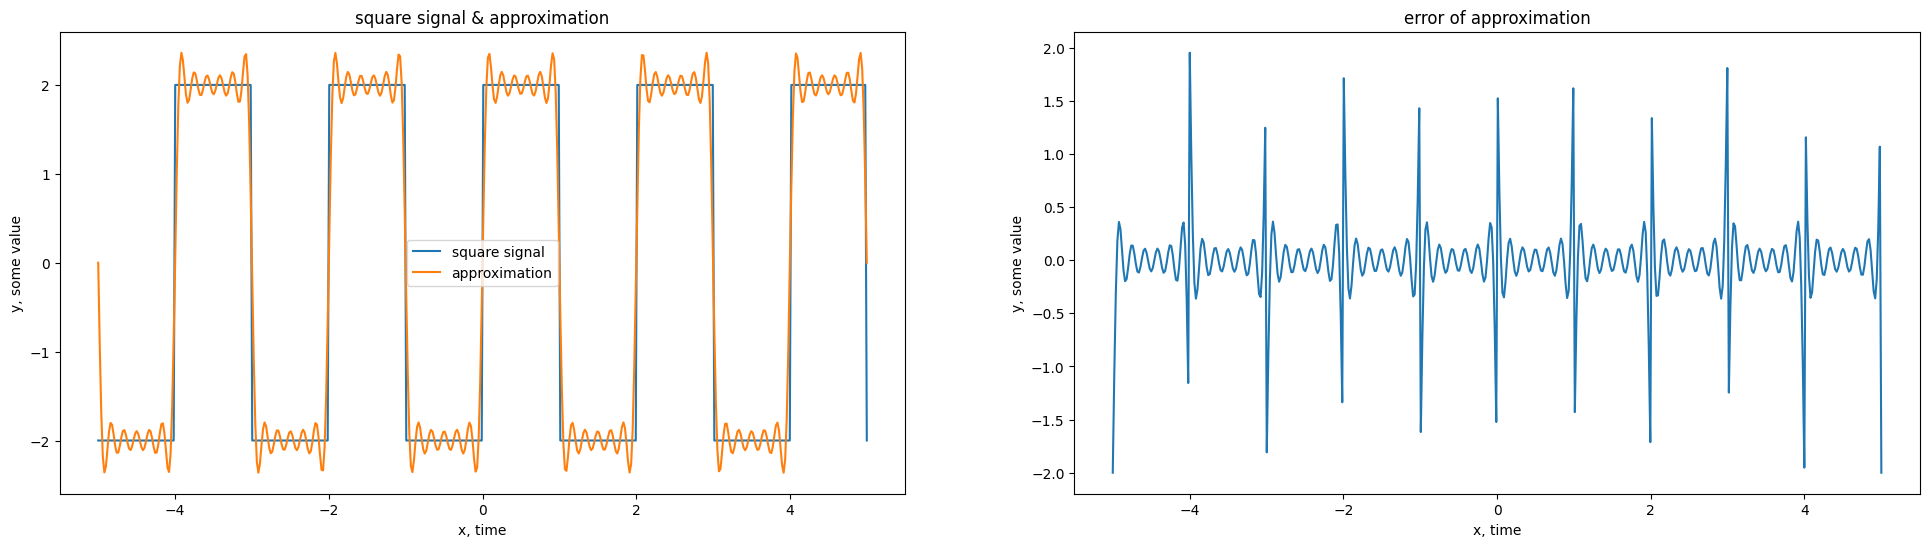

In [14]:
plt.figure(figsize=(24, 6))

plt.subplot(121)
plt.plot(square_args, y_square)
plt.plot(square_args, y_square_approximate)
plt.title("square signal & approximation")
plt.legend(["square signal", "approximation"])
plt.xlabel("x, time")
plt.ylabel("y, some value") 

plt.subplot(122) 
plt.plot(square_args, error)
plt.title("error of approximation")
plt.xlabel("x, time")
plt.ylabel("y, some value") 

plt.show()

In [6]:
def cos_func(x):
    f = 100
    return np.cos(2 * np.pi * f * x)

In [7]:
f = 100
T = 1 / f

cos_args = np.linspace(0, 0.1, num=500)
y_cos = [cos_func(i) for i in cos_args]
y_cos_approximate = [fourier_series(cos_func, i, 12, T) for i in cos_args]

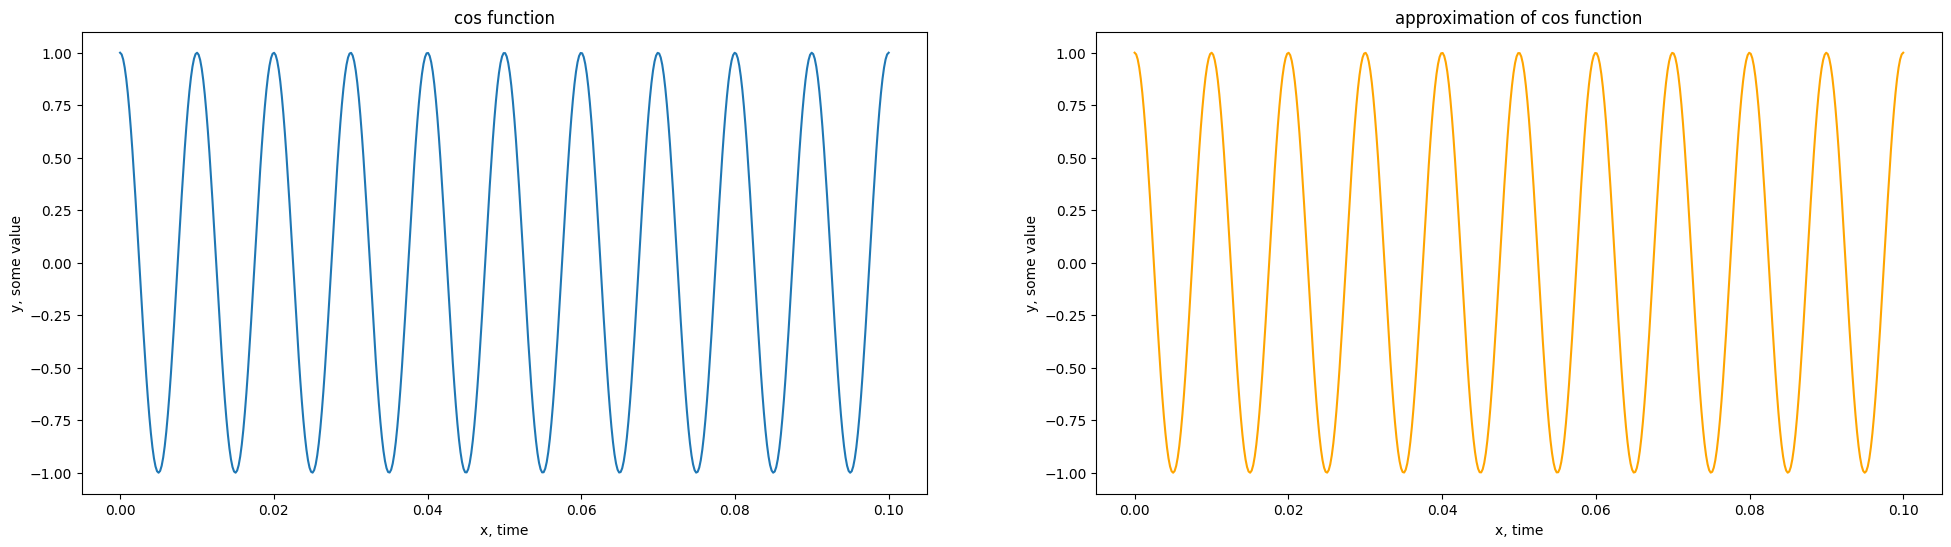

In [15]:
plt.figure(figsize=(24, 6))

plt.subplot(121)
plt.plot(cos_args, y_cos)
plt.title("cos function")
plt.xlabel("x, time")
plt.ylabel("y, some value") 

plt.subplot(122)
plt.plot(cos_args, y_cos_approximate,'orange')
plt.title("approximation of cos function")
plt.xlabel("x, time")
plt.ylabel("y, some value") 

plt.show()

Text(0, 0.5, 'y, amplitude')

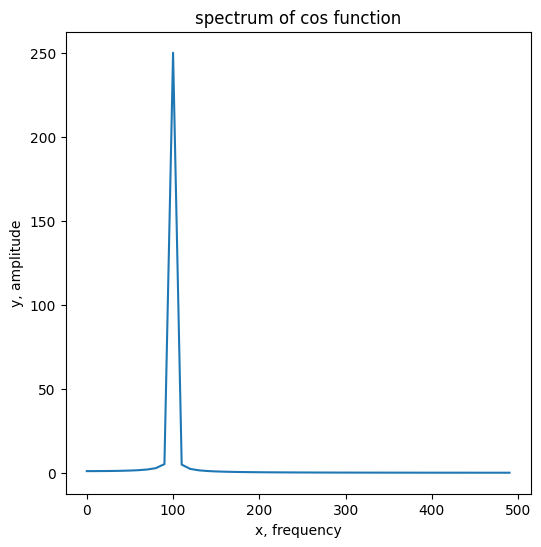

In [16]:
y_fft = np.fft.fft(y_cos)
x_fft = np.fft.fftfreq(500, 0.1 / 500)

plt.figure(figsize=(6, 6))

plt.plot(x_fft[0:50], np.abs(y_fft)[0:50])
plt.title("spectrum of cos function")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 

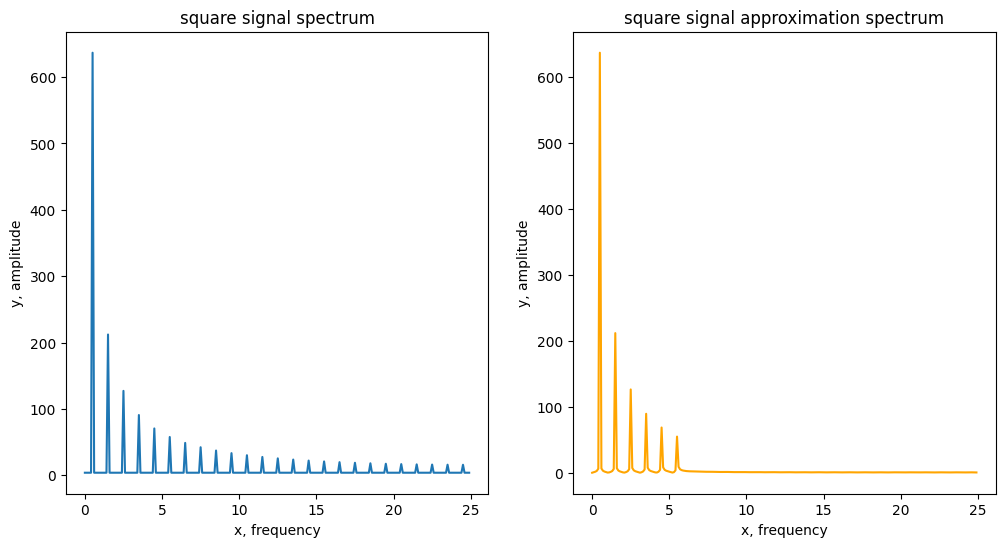

In [17]:
y_square_fft = np.fft.fft(y_square)
y_square_approximate_fft = np.fft.fft(y_square_approximate)
x_square_fft = np.fft.fftfreq(500, 10 / 500)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(x_square_fft[0:250], np.abs(y_square_fft)[0:250])
plt.title("square signal spectrum")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 

plt.subplot(122)
plt.plot(x_square_fft[0:250], np.abs(y_square_approximate_fft)[0:250], 'orange')
plt.title("square signal approximation spectrum")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 

plt.show()

In [11]:
y_square_noise = y_square + np.random.normal(0, 1, 500)
y_square_noise_fft = np.fft.fft(y_square_noise)

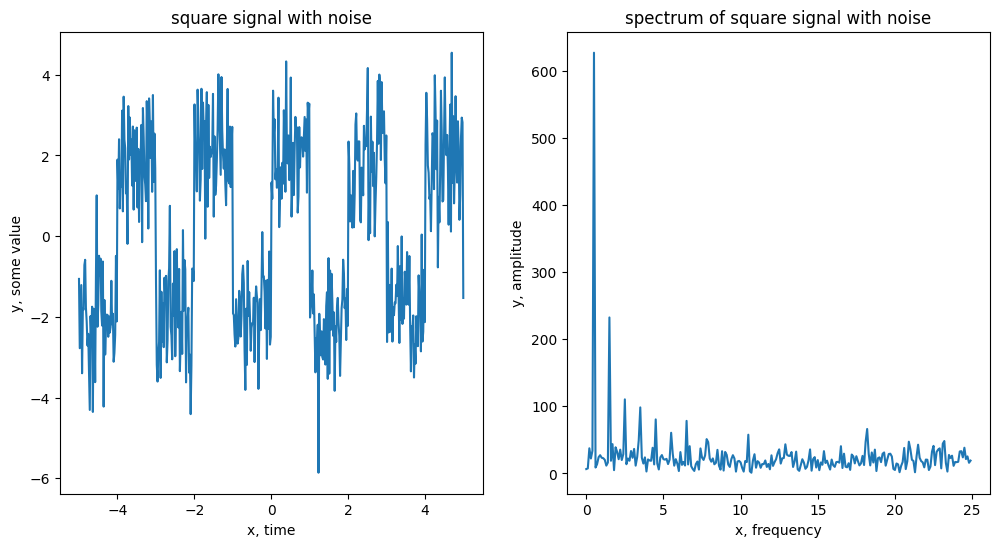

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(square_args, y_square_noise)
plt.title("square signal with noise")
plt.xlabel("x, time")
plt.ylabel("y, some value") 

plt.subplot(122)
plt.plot(x_square_fft[0:250], np.abs(y_square_noise_fft)[0:250])
plt.title("spectrum of square signal with noise")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 

plt.show()